训练集分类错误： 0.0
测试集分类错误： 0.0


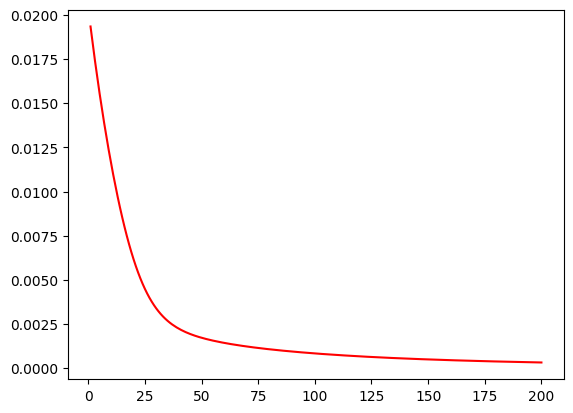

In [11]:
import pandas
import numpy as np
from matplotlib import pyplot as plt

df=pandas.read_csv('alcohol_dataset.csv')
data=np.array(df)

m_all=np.shape(data)[0]
d=np.shape(data)[1]-1
m_train=300
m_test=m_all-m_train
learning_rate=0.1
iteration=200
n=12
rng=np.random.default_rng(2)
rng.shuffle(data)

mean=np.mean(data[:m_train,:d],axis=0)
std=np.std(data[:m_train,:d],axis=0,ddof=1)
data[:,:d]=(data[:,:d]-mean)/std
x_train=data[:m_train,:d].T
y_train=data[:m_train,d].reshape(1,-1)
x_test=data[m_train:,:d].T
y_test=data[m_train:,d].T

w_1=rng.random((d,n))
w_2=rng.random((n,1))
b_1=rng.random((n,1))
b_2=rng.random()
v=np.ones((1,m_train))

cost_saved=[]
for i in range (iteration):
    z_1=np.dot(w_1.T,x_train)+b_1
    a=z_1*(z_1>0)
    z_2=np.dot(w_2.T,a)+b_2
    y_hat=1/(1+np.exp(-z_2))
    e=y_hat-y_train
    cost=-(np.dot(y_train.T,np.log(y_hat))+np.dot((1-y_train).T,np.log(1-y_hat)))/m_train
    w_1=w_1-learning_rate*np.dot(x_train,(np.dot(w_2,e)*((z_1)>0)).T)/m_train
    w_2=w_2-learning_rate*np.dot(a,e.T)/m_train
    b_1=b_1-learning_rate*np.dot(np.dot(w_2,v)*(z_1>0),e.T)/m_train
    b_2=b_2-learning_rate*np.dot(v,e.T)/m_train
    cost_saved.append(cost.item(0))
print('训练集分类错误：',np.sum(y_train-(y_hat>0.5)))

z_1=np.dot(w_1.T,x_test)+b_1
a=z_1*(z_1>0)
z_2=np.dot(w_2.T,a)+b_2
y_hat=1/(1+np.exp(-z_2))
print('测试集分类错误：',np.sum(y_test-(y_hat>0.5)))

plt.plot(range(1,len(cost_saved)+1),cost_saved,'r')
plt.show()



